In [2]:
import sys
sys.path.append("/home/phylab/hepwork/ma5-histo")
sys.path.append("/home/phylab/hepwork/ma5_expert")

import src.SafReader as sr
from CutFlowReader import Collection 

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

In [3]:
def df(fileLoc):
    data = sr.read(fileLoc=fileLoc)
    floatCols=['binMin', 'binMax', 'value']
    data[floatCols]  = data[floatCols].apply(pd.to_numeric, errors='coerce')
    data["bin"]      = (data.binMin+data.binMax)/2
    data             = data[data.binMax != np.inf]
    data             = data[data.binMin != -1*np.inf]
    data["binlabel"] = (data.binMin+data.binMax)/2
    return data

In [6]:
ma5 = '/home/phylab/hepwork/madanalysis5'

##################### SM LO ######################
SM_LO  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll/MadAnalysis5job_4/Cutflows',
                    saf_file       = ma5+'/SSM_Zptoll/Output/SAF/SMtoll/SMtoll.saf',
                    lumi           = 300.)
SM_LO_RapNo_sumw   = (SM_LO['Rap_No'][0].sumw)
SM_LO_Rap00_sumw   = (SM_LO['Rap_00'][0].sumw)
SM_LO_Rap01_sumw   = (SM_LO['Rap_01'][0].sumw)
SM_LO_Rap02_sumw   = (SM_LO['Rap_02'][0].sumw)
SM_LO_Rap04_sumw   = (SM_LO['Rap_04'][0].sumw)
SM_LO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll/MadAnalysis5job_4/Histograms/histos.saf')

############################## SM NLO #####################################
SM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_NLO/MadAnalysis5job_1/Cutflows', xsection = 0.00009826266, lumi= 300.)
SM_NLO_RapNo_sumw   = (SM_NLO['Rap_No'][0].sumw)
SM_NLO_Rap00_sumw   = (SM_NLO['Rap_00'][0].sumw)
SM_NLO_Rap01_sumw   = (SM_NLO['Rap_01'][0].sumw)
SM_NLO_Rap02_sumw   = (SM_NLO['Rap_02'][0].sumw)
SM_NLO_Rap04_sumw   = (SM_NLO['Rap_04'][0].sumw)
SM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_NLO/MadAnalysis5job_1/Histograms/histos.saf')

############################## Sequential SM ##############################
SSM_LO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/BSMtoll/MadAnalysis5job_1/Cutflows',
                    saf_file       = ma5+'/SSM_Zptoll/Output/SAF/BSMtoll/BSMtoll.saf',
                    lumi           = 300.)
SSM_LO_RapNo_sumw   = (SSM_LO['Rap_No'][0].sumw)
SSM_LO_Rap00_sumw   = (SSM_LO['Rap_00'][0].sumw)
SSM_LO_Rap01_sumw   = (SSM_LO['Rap_01'][0].sumw)
SSM_LO_Rap02_sumw   = (SSM_LO['Rap_02'][0].sumw)
SSM_LO_Rap04_sumw   = (SSM_LO['Rap_04'][0].sumw)
SSM_LO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/BSMtoll/MadAnalysis5job_1/Histograms/histos.saf')

############################## Sequential SM NLO (Only Z')##############################
xsec_run01 = 3.231871e-03; nevent_run01 = 200000  
xsec_run02 = 3.234041e-03; nevent_run02 = 100000
xsec_run03 = 3.237111e-03; nevent_run03 = 500000
xsec_run04 = 3.239792e-03; nevent_run04 = 600000
xsec_run06 = 2.595824e-04; nevent_run06 = 500000
xsec_run07 = 9.043e-05;    nevent_run07 = 500000
xsec_run08 = 9.049e-05;    nevent_run08 = 500000
xsec_tot = (xsec_run01*nevent_run01 + xsec_run02*nevent_run02 + xsec_run03*nevent_run03 + xsec_run04*nevent_run04 + xsec_run06*nevent_run06 + xsec_run07*nevent_run07 + xsec_run08*nevent_run08)/(nevent_run01+nevent_run02+nevent_run03+nevent_run04+nevent_run06+nevent_run07+nevent_run08)
SSM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SSMll_NLO/MadAnalysis5job_0/Cutflows',xsection=xsec_tot, lumi= 300.)
SSM_NLO_RapNo_sumw   = (SSM_NLO['Rap_No'][0].sumw)
SSM_NLO_Rap00_sumw   = (SSM_NLO['Rap_00'][0].sumw)
SSM_NLO_Rap01_sumw   = (SSM_NLO['Rap_01'][0].sumw)
SSM_NLO_Rap02_sumw   = (SSM_NLO['Rap_02'][0].sumw)
SSM_NLO_Rap04_sumw   = (SSM_NLO['Rap_04'][0].sumw)
SSM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SSMll_NLO/MadAnalysis5job_0/Histograms/histos.saf')

############################## Interference between SM and Sequential SM @LO #############
xsec_run01 = -1.237357e-04; nevent_run01 = 200000  
xsec_run02 = -9.068639e-05; nevent_run02 = 196726
xsec_run03 = -0.0001238;    nevent_run03 = 10000000
xsec_run04 = -0.0001239792; nevent_run04 = 10000000
xsec_tot   = (xsec_run01*nevent_run01 + xsec_run02*nevent_run02 + xsec_run03*nevent_run03 + xsec_run04*nevent_run04)/(nevent_run01+nevent_run02+nevent_run03+nevent_run04)
Inter_SMvsSSM = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SSMtoll_LO_Interference/MadAnalysis5job_5/Cutflows', xsection=xsec_tot, lumi= 300.)
Inter_SMvsSSM_RapNo_sumw   = (Inter_SMvsSSM['Rap_No'][0].sumw)
Inter_SMvsSSM_Rap00_sumw   = (Inter_SMvsSSM['Rap_00'][0].sumw)
Inter_SMvsSSM_Rap01_sumw   = (Inter_SMvsSSM['Rap_01'][0].sumw)
Inter_SMvsSSM_Rap02_sumw   = (Inter_SMvsSSM['Rap_02'][0].sumw)
Inter_SMvsSSM_Rap04_sumw   = (Inter_SMvsSSM['Rap_04'][0].sumw)
Inter_SMvsSSM_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SSMtoll_LO_Interference/MadAnalysis5job_5/Histograms/histos.saf')

######################## LRSM @LO ######################################
xsec_tot = 1.606569e-03
LRSM_LO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/LRSMdilep_LO/MadAnalysis5job_0/Cutflows', xsection=xsec_tot, lumi= 300.)
LRSM_LO_RapNo_sumw   = (LRSM_LO['Rap_No'][0].sumw)
LRSM_LO_Rap00_sumw   = (LRSM_LO['Rap_00'][0].sumw)
LRSM_LO_Rap01_sumw   = (LRSM_LO['Rap_01'][0].sumw)
LRSM_LO_Rap02_sumw   = (LRSM_LO['Rap_02'][0].sumw)
LRSM_LO_Rap04_sumw   = (LRSM_LO['Rap_04'][0].sumw)
LRSM_LO_histos       = df(ma5+'/SSM_Zptoll/Output/SAF/LRSMdilep_LO/MadAnalysis5job_0/Histograms/histos.saf')

######################## ALRSM @LO ######################################
ALRSM_LO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/ALRSMdilep_LO/MadAnalysis5job_0/Cutflows', 
                      saf_file       = ma5+'/SSM_Zptoll/Output/SAF/ALRSMdilep_LO/ALRSMdilep_LO.saf', lumi= 300.)
ALRSM_LO_RapNo_sumw   = (ALRSM_LO['Rap_No'][0].sumw)
ALRSM_LO_Rap00_sumw   = (ALRSM_LO['Rap_00'][0].sumw)
ALRSM_LO_Rap01_sumw   = (ALRSM_LO['Rap_01'][0].sumw)
ALRSM_LO_Rap02_sumw   = (ALRSM_LO['Rap_02'][0].sumw)
ALRSM_LO_Rap04_sumw   = (ALRSM_LO['Rap_04'][0].sumw)
ALRSM_LO_histos       = df(ma5+'/SSM_Zptoll/Output/SAF/ALRSMdilep_LO/MadAnalysis5job_0/Histograms/histos.saf')

######################## AddSU2L @LO ######################################
AddSU2L_LO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/AddSU2Ldilep_LO/MadAnalysis5job_0/Cutflows', 
                      saf_file       = ma5+'/SSM_Zptoll/Output/SAF/AddSU2Ldilep_LO/AddSU2Ldilep_LO.saf', lumi= 300.)
AddSU2L_LO_RapNo_sumw   = (AddSU2L_LO['Rap_No'][0].sumw)
AddSU2L_LO_Rap00_sumw   = (AddSU2L_LO['Rap_00'][0].sumw)
AddSU2L_LO_Rap01_sumw   = (AddSU2L_LO['Rap_01'][0].sumw)
AddSU2L_LO_Rap02_sumw   = (AddSU2L_LO['Rap_02'][0].sumw)
AddSU2L_LO_Rap04_sumw   = (AddSU2L_LO['Rap_04'][0].sumw)
AddSU2L_LO_histos       = df(ma5+'/SSM_Zptoll/Output/SAF/AddSU2Ldilep_LO/MadAnalysis5job_0/Histograms/histos.saf')

In [7]:
#from CutFlowTable import CutFlowTable
#out =open('Comparison_LOvsNLO.tex','w')
#CutFlowTable(sm,StockSM, sample_names=['SM @LO','SM @LO using NLO pac']).write_comparison_table(out, mcunc=False)
#!make > mk.log && rm Makefile

In [8]:
lumi=300.
bins = np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binMax)]

In [9]:
########### Standard Model @LO ########################

########### SM @LO AFB [ETA(l- > 0)] ##################

SM_LO_AFBp_RapNo = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*SM_LO.xsec/SM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBp_Rap00 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBp_Rap01 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBp_Rap02 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### SM @LO AFB [ETA(l- < 0)] ##################

SM_LO_AFBm_RapNo = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*SM_LO.xsec/SM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBm_Rap00 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBm_Rap01 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_AFBm_Rap02 = plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*SM_LO.xsec/SM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SM_LO_AFBnum_RapNo = SM_LO_AFBp_RapNo[0] - SM_LO_AFBm_RapNo[0]
SM_LO_AFBden_RapNo = SM_LO_AFBp_RapNo[0] + SM_LO_AFBm_RapNo[0]

SM_LO_AFBnum_Rap00 = SM_LO_AFBp_Rap00[0] - SM_LO_AFBm_Rap00[0]
SM_LO_AFBden_Rap00 = SM_LO_AFBp_Rap00[0] + SM_LO_AFBm_Rap00[0]

SM_LO_AFBnum_Rap01 = SM_LO_AFBp_Rap01[0] - SM_LO_AFBm_Rap01[0]
SM_LO_AFBden_Rap01 = SM_LO_AFBp_Rap01[0] + SM_LO_AFBm_Rap01[0]

SM_LO_AFBnum_Rap02 = SM_LO_AFBp_Rap02[0] - SM_LO_AFBm_Rap02[0]
SM_LO_AFBden_Rap02 = SM_LO_AFBp_Rap02[0] + SM_LO_AFBm_Rap02[0]

In [10]:
########### Standard Model @NLO ########################

########### SM @NLO AFB [ETA(l- > 0)] ##################

SM_NLO_AFBp_RapNo = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*SM_NLO.xsec/SM_NLO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap00 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap01 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap02 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### SM @NLO AFB [ETA(l- < 0)] ##################

SM_NLO_AFBm_RapNo = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*SM_NLO.xsec/SM_NLO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap00 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap01 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap02 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SM_NLO_AFBnum_RapNo = SM_NLO_AFBp_RapNo[0] - SM_NLO_AFBm_RapNo[0]
SM_NLO_AFBden_RapNo = SM_NLO_AFBp_RapNo[0] + SM_NLO_AFBm_RapNo[0]

SM_NLO_AFBnum_Rap00 = SM_NLO_AFBp_Rap00[0] - SM_NLO_AFBm_Rap00[0]
SM_NLO_AFBden_Rap00 = SM_NLO_AFBp_Rap00[0] + SM_NLO_AFBm_Rap00[0]

SM_NLO_AFBnum_Rap01 = SM_NLO_AFBp_Rap01[0] - SM_NLO_AFBm_Rap01[0]
SM_NLO_AFBden_Rap01 = SM_NLO_AFBp_Rap01[0] + SM_NLO_AFBm_Rap01[0]

SM_NLO_AFBnum_Rap02 = SM_NLO_AFBp_Rap02[0] - SM_NLO_AFBm_Rap02[0]
SM_NLO_AFBden_Rap02 = SM_NLO_AFBp_Rap02[0] + SM_NLO_AFBm_Rap02[0]

In [11]:
########### Sequential Standard Model @LO ########################

########### Sequential SM @LO AFB [ETA(l- > 0)] ##################

SSM_LO_AFBp_RapNo = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*SSM_LO.xsec/SSM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBp_Rap00 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBp_Rap01 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBp_Rap02 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### Sequential SM @LO AFB [ETA(l- < 0)] ##################

SSM_LO_AFBm_RapNo = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*SSM_LO.xsec/SSM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBm_Rap00 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBm_Rap01 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_AFBm_Rap02 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*SSM_LO.xsec/SSM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SSM_LO_AFBnum_RapNo = SSM_LO_AFBp_RapNo[0] - SSM_LO_AFBm_RapNo[0]
SSM_LO_AFBden_RapNo = SSM_LO_AFBp_RapNo[0] + SSM_LO_AFBm_RapNo[0]

SSM_LO_AFBnum_Rap00 = SSM_LO_AFBp_Rap00[0] - SSM_LO_AFBm_Rap00[0]
SSM_LO_AFBden_Rap00 = SSM_LO_AFBp_Rap00[0] + SSM_LO_AFBm_Rap00[0]

SSM_LO_AFBnum_Rap01 = SSM_LO_AFBp_Rap01[0] - SSM_LO_AFBm_Rap01[0]
SSM_LO_AFBden_Rap01 = SSM_LO_AFBp_Rap01[0] + SSM_LO_AFBm_Rap01[0]

SSM_LO_AFBnum_Rap02 = SSM_LO_AFBp_Rap02[0] - SSM_LO_AFBm_Rap02[0]
SSM_LO_AFBden_Rap02 = SSM_LO_AFBp_Rap02[0] + SSM_LO_AFBm_Rap02[0]

In [12]:
########### Sequential Standard Model @NLO ########################

# Calculate the number of events of SM + vPrime + Interference
# For AFBpos
SM_NLO_weights_AFBpos_RapNo  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*SM_NLO.xsec/SM_NLO_RapNo_sumw
SSM_NLO_weights_AFBpos_RapNo = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_RapNo_sumw
Inter_SMvsSSM_weights_AFBpos_RapNo = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_RapNo_sumw

SM_NLO_weights_AFBpos_Rap00  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap00_sumw
SSM_NLO_weights_AFBpos_Rap00 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap00_sumw
Inter_SMvsSSM_weights_AFBpos_Rap00 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap00_sumw

SM_NLO_weights_AFBpos_Rap01  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap01_sumw
SSM_NLO_weights_AFBpos_Rap01 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap01_sumw
Inter_SMvsSSM_weights_AFBpos_Rap01 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap01_sumw

SM_NLO_weights_AFBpos_Rap02  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap02_sumw
SSM_NLO_weights_AFBpos_Rap02 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap02_sumw
Inter_SMvsSSM_weights_AFBpos_Rap02 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap02_sumw

#For AFBneg
SM_NLO_weights_AFBneg_RapNo  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*SM_NLO.xsec/SM_NLO_RapNo_sumw
SSM_NLO_weights_AFBneg_RapNo = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_RapNo_sumw
Inter_SMvsSSM_weights_AFBneg_RapNo = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_RapNo_sumw

SM_NLO_weights_AFBneg_Rap00  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap00_sumw
SSM_NLO_weights_AFBneg_Rap00 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap00_sumw
Inter_SMvsSSM_weights_AFBneg_Rap00 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap00_sumw

SM_NLO_weights_AFBneg_Rap01  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap01_sumw
SSM_NLO_weights_AFBneg_Rap01 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap01_sumw
Inter_SMvsSSM_weights_AFBneg_Rap01 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap01_sumw

SM_NLO_weights_AFBneg_Rap02  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap02_sumw
SSM_NLO_weights_AFBneg_Rap02 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap02_sumw
Inter_SMvsSSM_weights_AFBneg_Rap02 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap02_sumw

########### Sequential SM @NLO AFB [ETA(l- > 0)] ##################

SSM_NLO_AFBp_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_RapNo+SSM_NLO_weights_AFBpos_RapNo+Inter_SMvsSSM_weights_AFBpos_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap00+SSM_NLO_weights_AFBpos_Rap00+Inter_SMvsSSM_weights_AFBpos_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap01+SSM_NLO_weights_AFBpos_Rap01+Inter_SMvsSSM_weights_AFBpos_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap02+SSM_NLO_weights_AFBpos_Rap02+Inter_SMvsSSM_weights_AFBpos_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

#print(SM_NLO_weights_AFBpos_RapNo)
#print(SM_NLO_weights_AFBneg_RapNo)

#print(SSM_NLO_weights_AFBpos_RapNo)
#print(SSM_NLO_weights_AFBneg_RapNo)

#print(Inter_SMvsSSM_weights_AFBpos_RapNo)
#print(Inter_SMvsSSM_weights_AFBneg_RapNo)

########### Sequential SM @NLO AFB [ETA(l- < 0)] ##################

SSM_NLO_AFBm_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_RapNo+SSM_NLO_weights_AFBneg_RapNo+Inter_SMvsSSM_weights_AFBneg_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap00+SSM_NLO_weights_AFBneg_Rap00+Inter_SMvsSSM_weights_AFBneg_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap01+SSM_NLO_weights_AFBneg_Rap01+Inter_SMvsSSM_weights_AFBneg_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap02+SSM_NLO_weights_AFBneg_Rap02+Inter_SMvsSSM_weights_AFBneg_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################
SSM_NLO_AFBnum_RapNo = SSM_NLO_AFBp_RapNo[0] - SSM_NLO_AFBm_RapNo[0]
SSM_NLO_AFBden_RapNo = SSM_NLO_AFBp_RapNo[0] + SSM_NLO_AFBm_RapNo[0]

SSM_NLO_AFBnum_Rap00 = SSM_NLO_AFBp_Rap00[0] - SSM_NLO_AFBm_Rap00[0]
SSM_NLO_AFBden_Rap00 = SSM_NLO_AFBp_Rap00[0] + SSM_NLO_AFBm_Rap00[0]

SSM_NLO_AFBnum_Rap01 = SSM_NLO_AFBp_Rap01[0] - SSM_NLO_AFBm_Rap01[0]
SSM_NLO_AFBden_Rap01 = SSM_NLO_AFBp_Rap01[0] + SSM_NLO_AFBm_Rap01[0]

SSM_NLO_AFBnum_Rap02 = SSM_NLO_AFBp_Rap02[0] - SSM_NLO_AFBm_Rap02[0]
SSM_NLO_AFBden_Rap02 = SSM_NLO_AFBp_Rap02[0] + SSM_NLO_AFBm_Rap02[0]

In [13]:
########### Sequential Standard Model @NLO (Only Z') ########################

########### Sequential SM @NLO (Only Z') AFB [ETA(l- > 0)] ##################

SSMOnlyZp_NLO_AFBp_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBpos_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBp_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBpos_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBp_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBpos_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBp_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBpos_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### Sequential SM @NLO (Only Z') AFB [ETA(l- < 0)] ##################

SSMOnlyZp_NLO_AFBm_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBneg_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBm_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBneg_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBm_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBneg_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBm_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBneg_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SSMOnlyZp_NLO_AFBnum_RapNo = SSMOnlyZp_NLO_AFBp_RapNo[0] - SSMOnlyZp_NLO_AFBm_RapNo[0]
SSMOnlyZp_NLO_AFBden_RapNo = SSMOnlyZp_NLO_AFBp_RapNo[0] + SSMOnlyZp_NLO_AFBm_RapNo[0]

SSMOnlyZp_NLO_AFBnum_Rap00 = SSMOnlyZp_NLO_AFBp_Rap00[0] - SSMOnlyZp_NLO_AFBm_Rap00[0]
SSMOnlyZp_NLO_AFBden_Rap00 = SSMOnlyZp_NLO_AFBp_Rap00[0] + SSMOnlyZp_NLO_AFBm_Rap00[0]

SSMOnlyZp_NLO_AFBnum_Rap01 = SSMOnlyZp_NLO_AFBp_Rap01[0] - SSMOnlyZp_NLO_AFBm_Rap01[0]
SSMOnlyZp_NLO_AFBden_Rap01 = SSMOnlyZp_NLO_AFBp_Rap01[0] + SSMOnlyZp_NLO_AFBm_Rap01[0]

SSMOnlyZp_NLO_AFBnum_Rap02 = SSMOnlyZp_NLO_AFBp_Rap02[0] - SSMOnlyZp_NLO_AFBm_Rap02[0]
SSMOnlyZp_NLO_AFBden_Rap02 = SSMOnlyZp_NLO_AFBp_Rap02[0] + SSMOnlyZp_NLO_AFBm_Rap02[0]

In [14]:
########### LRSM @LO Full ########################

########### LRSM@LO Full AFB [ETA(l- > 0)] ##################

LRSM_LO_AFBp_RapNo = plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*LRSM_LO.xsec/LRSM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

LRSM_LO_AFBp_Rap00 = plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*LRSM_LO.xsec/LRSM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

LRSM_LO_AFBp_Rap01 = plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*LRSM_LO.xsec/LRSM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

LRSM_LO_AFBp_Rap02 = plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*LRSM_LO.xsec/LRSM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### LRSM@LO Full AFB [ETA(l- < 0)] ##################

LRSM_LO_AFBm_RapNo = plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*LRSM_LO.xsec/LRSM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

LRSM_LO_AFBm_Rap00 = plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*LRSM_LO.xsec/LRSM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

LRSM_LO_AFBm_Rap01 = plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*LRSM_LO.xsec/LRSM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

LRSM_LO_AFBm_Rap02 = plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*LRSM_LO.xsec/LRSM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

LRSM_LO_AFBnum_RapNo = LRSM_LO_AFBp_RapNo[0] - LRSM_LO_AFBm_RapNo[0]
LRSM_LO_AFBden_RapNo = LRSM_LO_AFBp_RapNo[0] + LRSM_LO_AFBm_RapNo[0]

LRSM_LO_AFBnum_Rap00 = LRSM_LO_AFBp_Rap00[0] - LRSM_LO_AFBm_Rap00[0]
LRSM_LO_AFBden_Rap00 = LRSM_LO_AFBp_Rap00[0] + LRSM_LO_AFBm_Rap00[0]

LRSM_LO_AFBnum_Rap01 = LRSM_LO_AFBp_Rap01[0] - LRSM_LO_AFBm_Rap01[0]
LRSM_LO_AFBden_Rap01 = LRSM_LO_AFBp_Rap01[0] + LRSM_LO_AFBm_Rap01[0]

LRSM_LO_AFBnum_Rap02 = LRSM_LO_AFBp_Rap02[0] - LRSM_LO_AFBm_Rap02[0]
LRSM_LO_AFBden_Rap02 = LRSM_LO_AFBp_Rap02[0] + LRSM_LO_AFBm_Rap02[0]

In [15]:
########### ALRSM@LO Full ########################

########### ALRSM@LO Full AFB [ETA(l- > 0)] ##################

ALRSM_LO_AFBp_RapNo = plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*ALRSM_LO.xsec/ALRSM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

ALRSM_LO_AFBp_Rap00 = plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*ALRSM_LO.xsec/ALRSM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

ALRSM_LO_AFBp_Rap01 = plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*ALRSM_LO.xsec/ALRSM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

ALRSM_LO_AFBp_Rap02 = plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*ALRSM_LO.xsec/ALRSM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### ALRSM@LO Full AFB [ETA(l- < 0)] ##################

ALRSM_LO_AFBm_RapNo = plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*ALRSM_LO.xsec/ALRSM_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

ALRSM_LO_AFBm_Rap00 = plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*ALRSM_LO.xsec/ALRSM_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

ALRSM_LO_AFBm_Rap01 = plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*ALRSM_LO.xsec/ALRSM_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

ALRSM_LO_AFBm_Rap02 = plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*ALRSM_LO.xsec/ALRSM_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

ALRSM_LO_AFBnum_RapNo = ALRSM_LO_AFBp_RapNo[0] - ALRSM_LO_AFBm_RapNo[0]
ALRSM_LO_AFBden_RapNo = ALRSM_LO_AFBp_RapNo[0] + ALRSM_LO_AFBm_RapNo[0]

ALRSM_LO_AFBnum_Rap00 = ALRSM_LO_AFBp_Rap00[0] - ALRSM_LO_AFBm_Rap00[0]
ALRSM_LO_AFBden_Rap00 = ALRSM_LO_AFBp_Rap00[0] + ALRSM_LO_AFBm_Rap00[0]

ALRSM_LO_AFBnum_Rap01 = ALRSM_LO_AFBp_Rap01[0] - ALRSM_LO_AFBm_Rap01[0]
ALRSM_LO_AFBden_Rap01 = ALRSM_LO_AFBp_Rap01[0] + ALRSM_LO_AFBm_Rap01[0]

ALRSM_LO_AFBnum_Rap02 = ALRSM_LO_AFBp_Rap02[0] - ALRSM_LO_AFBm_Rap02[0]
ALRSM_LO_AFBden_Rap02 = ALRSM_LO_AFBp_Rap02[0] + ALRSM_LO_AFBm_Rap02[0]

In [16]:
########### AddSU2L@LO Full ########################

########### AddSU2L@LO Full AFB [ETA(l- > 0)] ##################

AddSU2L_LO_AFBp_RapNo = plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*AddSU2L_LO.xsec/AddSU2L_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

AddSU2L_LO_AFBp_Rap00 = plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*AddSU2L_LO.xsec/AddSU2L_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

AddSU2L_LO_AFBp_Rap01 = plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*AddSU2L_LO.xsec/AddSU2L_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

AddSU2L_LO_AFBp_Rap02 = plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*AddSU2L_LO.xsec/AddSU2L_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### AddSU2L@LO Full AFB [ETA(l- < 0)] ##################

AddSU2L_LO_AFBm_RapNo = plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*AddSU2L_LO.xsec/AddSU2L_LO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

AddSU2L_LO_AFBm_Rap00 = plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*AddSU2L_LO.xsec/AddSU2L_LO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

AddSU2L_LO_AFBm_Rap01 = plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*AddSU2L_LO.xsec/AddSU2L_LO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

AddSU2L_LO_AFBm_Rap02 = plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*AddSU2L_LO.xsec/AddSU2L_LO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

AddSU2L_LO_AFBnum_RapNo = AddSU2L_LO_AFBp_RapNo[0] - AddSU2L_LO_AFBm_RapNo[0]
AddSU2L_LO_AFBden_RapNo = AddSU2L_LO_AFBp_RapNo[0] + AddSU2L_LO_AFBm_RapNo[0]

AddSU2L_LO_AFBnum_Rap00 = AddSU2L_LO_AFBp_Rap00[0] - AddSU2L_LO_AFBm_Rap00[0]
AddSU2L_LO_AFBden_Rap00 = AddSU2L_LO_AFBp_Rap00[0] + AddSU2L_LO_AFBm_Rap00[0]

AddSU2L_LO_AFBnum_Rap01 = AddSU2L_LO_AFBp_Rap01[0] - AddSU2L_LO_AFBm_Rap01[0]
AddSU2L_LO_AFBden_Rap01 = AddSU2L_LO_AFBp_Rap01[0] + AddSU2L_LO_AFBm_Rap01[0]

AddSU2L_LO_AFBnum_Rap02 = AddSU2L_LO_AFBp_Rap02[0] - AddSU2L_LO_AFBm_Rap02[0]
AddSU2L_LO_AFBden_Rap02 = AddSU2L_LO_AFBp_Rap02[0] + AddSU2L_LO_AFBm_Rap02[0]

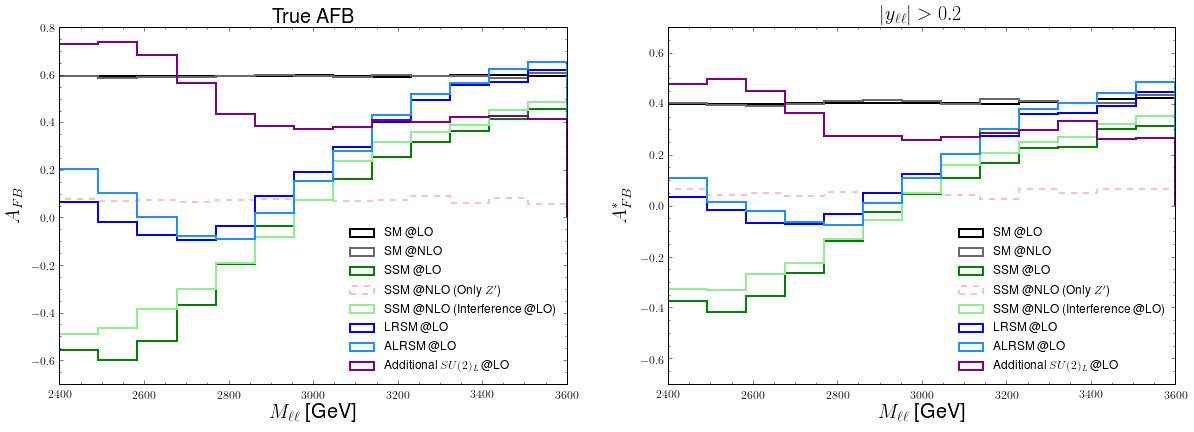

In [20]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
bins = np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binMax)]

############ Plotting ##################################

ax1 = plt.subplot(3, 2, 1)
plt.title("True AFB", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_RapNo/np.where(SM_LO_AFBden_RapNo==0,1e-10,SM_LO_AFBden_RapNo), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
             color=None, edgecolor='dimgray', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_LO_AFBnum_RapNo/np.where(SSM_LO_AFBden_RapNo==0,1e-10,SSM_LO_AFBden_RapNo), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
             weights=SSMOnlyZp_NLO_AFBnum_RapNo/np.where(SSMOnlyZp_NLO_AFBden_RapNo==0,1e-10,SSMOnlyZp_NLO_AFBden_RapNo), 
             color=None, edgecolor='pink', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'LRSM @LO', histtype="step", rwidth=1.0,
             weights=LRSM_LO_AFBnum_RapNo/np.where(LRSM_LO_AFBden_RapNo==0,1e-10,LRSM_LO_AFBden_RapNo), 
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'ALRSM @LO', histtype="step", rwidth=1.0,
             weights=ALRSM_LO_AFBnum_RapNo/np.where(ALRSM_LO_AFBden_RapNo==0,1e-10,ALRSM_LO_AFBden_RapNo), 
             color=None, edgecolor='dodgerblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'Additional $SU(2)_L$ @LO', histtype="step", rwidth=1.0,
             weights=AddSU2L_LO_AFBnum_RapNo/np.where(AddSU2L_LO_AFBden_RapNo==0,1e-10,AddSU2L_LO_AFBden_RapNo), 
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)

"""
ax2 = plt.subplot(3, 2, 2)
plt.title("No Cut", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_Rap00/np.where(SM_LO_AFBden_Rap00==0,1e-10,SM_LO_AFBden_Rap00), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_Rap00/np.where(SM_NLO_AFBden_Rap00==0,1e-10,SM_NLO_AFBden_Rap00), 
             color=None, edgecolor='dimgray', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
             label=r'SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_LO_AFBnum_Rap00/np.where(SSM_LO_AFBden_Rap00==0,1e-10,SSM_LO_AFBden_Rap00), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
             weights=SSMOnlyZp_NLO_AFBnum_Rap00/np.where(SSMOnlyZp_NLO_AFBden_Rap00==0,1e-10,SSMOnlyZp_NLO_AFBden_Rap00), 
             color=None, edgecolor='pink', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
             weights=SSM_NLO_AFBnum_Rap00/np.where(SSM_NLO_AFBden_Rap00==0,1e-10,SSM_NLO_AFBden_Rap00), 
             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
             label=r'LRSM @LO', histtype="step", rwidth=1.0,
             weights=LRSM_LO_AFBnum_Rap00/np.where(LRSM_LO_AFBden_Rap00==0,1e-10,LRSM_LO_AFBden_Rap00), 
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
             label=r'ALRSM @LO', histtype="step", rwidth=1.0,
             weights=ALRSM_LO_AFBnum_Rap00/np.where(ALRSM_LO_AFBden_Rap00==0,1e-10,ALRSM_LO_AFBden_Rap00), 
             color=None, edgecolor='dodgerblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
             label=r'Additional $SU(2)_L$ @LO', histtype="step", rwidth=1.0,
             weights=AddSU2L_LO_AFBnum_Rap00/np.where(AddSU2L_LO_AFBden_Rap00==0,1e-10,AddSU2L_LO_AFBden_Rap00), 
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}^*$' , fontsize=20)


ax3 = plt.subplot(3, 2, 3)
plt.title("$|y_{\ell \ell}| > 0.1$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_Rap01/np.where(SM_LO_AFBden_Rap01==0,1e-10,SM_LO_AFBden_Rap01), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_Rap01/np.where(SM_NLO_AFBden_Rap01==0,1e-10,SM_NLO_AFBden_Rap01), 
             color=None, edgecolor='dimgray', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
             label=r'SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_LO_AFBnum_Rap01/np.where(SSM_LO_AFBden_Rap01==0,1e-10,SSM_LO_AFBden_Rap01), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
             weights=SSMOnlyZp_NLO_AFBnum_Rap01/np.where(SSMOnlyZp_NLO_AFBden_Rap01==0,1e-10,SSMOnlyZp_NLO_AFBden_Rap01), 
             color=None, edgecolor='pink', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
             weights=SSM_NLO_AFBnum_Rap01/np.where(SSM_NLO_AFBden_Rap01==0,1e-10,SSM_NLO_AFBden_Rap01), 
             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
             label=r'LRSM @LO', histtype="step", rwidth=1.0,
             weights=LRSM_LO_AFBnum_Rap01/np.where(LRSM_LO_AFBden_Rap01==0,1e-10,LRSM_LO_AFBden_Rap01), 
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
             label=r'ALRSM @LO', histtype="step", rwidth=1.0,
             weights=ALRSM_LO_AFBnum_Rap01/np.where(ALRSM_LO_AFBden_Rap01==0,1e-10,ALRSM_LO_AFBden_Rap01), 
             color=None, edgecolor='dodgerblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
             label=r'Additional $SU(2)_L$ @LO', histtype="step", rwidth=1.0,
             weights=AddSU2L_LO_AFBnum_Rap01/np.where(AddSU2L_LO_AFBden_Rap01==0,1e-10,AddSU2L_LO_AFBden_Rap01), 
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}^*$' , fontsize=20)
"""

ax4 = plt.subplot(3, 2, 2)
plt.title("$|y_{\ell \ell}| > 0.2$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_LO_AFBnum_Rap02/np.where(SM_LO_AFBden_Rap02==0,1e-10,SM_LO_AFBden_Rap02), 
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBnum_Rap02/np.where(SM_NLO_AFBden_Rap02==0,1e-10,SM_NLO_AFBden_Rap02), 
             color=None, edgecolor='dimgray', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
             label=r'SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_LO_AFBnum_Rap02/np.where(SSM_LO_AFBden_Rap02==0,1e-10,SSM_LO_AFBden_Rap02), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
             weights=SSMOnlyZp_NLO_AFBnum_Rap02/np.where(SSMOnlyZp_NLO_AFBden_Rap02==0,1e-10,SSMOnlyZp_NLO_AFBden_Rap02), 
             color=None, edgecolor='pink', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
             weights=SSM_NLO_AFBnum_Rap02/np.where(SSM_NLO_AFBden_Rap02==0,1e-10,SSM_NLO_AFBden_Rap02), 
             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(LRSM_LO_histos[LRSM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
             label=r'LRSM @LO', histtype="step", rwidth=1.0,
             weights=LRSM_LO_AFBnum_Rap02/np.where(LRSM_LO_AFBden_Rap02==0,1e-10,LRSM_LO_AFBden_Rap02), 
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(ALRSM_LO_histos[ALRSM_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
             label=r'ALRSM @LO', histtype="step", rwidth=1.0,
             weights=ALRSM_LO_AFBnum_Rap02/np.where(ALRSM_LO_AFBden_Rap02==0,1e-10,ALRSM_LO_AFBden_Rap02), 
             color=None, edgecolor='dodgerblue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(AddSU2L_LO_histos[AddSU2L_LO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
             label=r'Additional $SU(2)_L$ @LO', histtype="step", rwidth=1.0,
             weights=AddSU2L_LO_AFBnum_Rap02/np.where(AddSU2L_LO_AFBden_Rap02==0,1e-10,AddSU2L_LO_AFBden_Rap02), 
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}^*$' , fontsize=20)


leg = ax1.legend(loc='lower right',fontsize=12)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])
ax1.set_ylim([-0.7,0.8])

#leg = ax2.legend(loc='lower right',fontsize=12)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
#leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
#leg.set_zorder(100)
#ax2.set_xlim([min(bins),max(bins)])
#ax2.set_ylim([-0.7,0.7])

#leg = ax3.legend(loc='lower right',fontsize=12)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
#leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
#leg.set_zorder(100)
#ax3.set_xlim([min(bins),max(bins)])
#ax3.set_ylim([-0.7,0.7])

leg = ax4.legend(loc='lower right',fontsize=12)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])
ax4.set_ylim([-0.7,0.7])


plt.subplots_adjust(top = 1.0, bottom=0.01, hspace=0.3, wspace=0.2)
plt.show()